<a href="https://colab.research.google.com/github/agelencs/darknet/blob/master/YOLOv4_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Cloning and Building Darknet

In [ ]:
# clone darknet repo
!git clone https://github.com/agelencs/darknet

In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

In [ ]:
ls

In [ ]:
cd /content/darknet/


In [ ]:
# verify CUDA
#!/usr/local/cuda/bin/nvcc --version

In [ ]:
# make darknet 
!make

# Step 2: Setup Google Drive Files to Use


In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [ ]:
# cd back into the darknet folder to run detections
%cd darknet

/content/darknet


In [ ]:
# This stops 'Run all' at this cell by causing an error
assert False

# Step 3: Download pre-trained YOLOv4 weights
YOLOv4 has been trained already on the coco dataset which has 80 classes that it can predict. 

[COCO CLASSES](http://cocodataset.org/#explore)


In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

In [ ]:
!cp /content/gdrive/MyDrive/View/code/yolov4_training/backup/yolov4-obj_last.weights ./

# Step 4: Run detection

# Step 5: Train Your Custom Object Detector!
The time has finally come! You have made it to the moment of truth! You are now ready to train your custom YOLOv4 object detector on whatever crazy classes you have decided on. So run the following command. (-dont_show flag stops chart from popping up since Colab Notebook can't open images on the spot, -map flag overlays mean average precision on chart to see how accuracy of your model is, only add map flag if you have a validation dataset)
```
!./darknet detector train <path to obj.data> <path to custom config> yolov4.conv.137 -dont_show -map
```
**TIP:** This training could take several hours depending on how many iterations you chose in the .cfg file. You will want to let this run as you sleep or go to work for the day, etc. However, Colab Cloud Service kicks you off it's VMs if you are idle for too long (30-90 mins).

To avoid this hold (CTRL + SHIFT + i) at the same time to open up the inspector view on your browser.

Paste the following code into your console window and hit **Enter**
```
function ClickConnect(){
console.log("Working"); 
document
  .querySelector('#top-toolbar > colab-connect-button')
  .shadowRoot.querySelector('#connect')
  .click() 
}
setInterval(ClickConnect,60000)
```
Looks like this, it will click the screen every 10 minutes so that you don't get kicked off for being idle! HACKS!

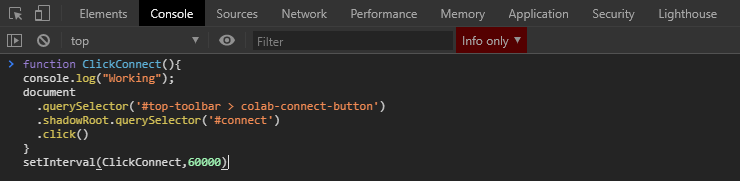

In [ ]:
!./darknet detector demo cfg/coco.data cfg/yolov4.cfg yolov4.weights -dont_show /content/gdrive/MyDrive/View/code/film_test.mp4 -i 0 -json_file_output /content/gdrive/MyDrive/View/code/film_test_results.json 

In [ ]:
!cp /content/gdrive/MyDrive/View/code/yolov4_training/obj.data ./cfg/
!cp /content/gdrive/MyDrive/View/code/yolov4_training/yolov4-obj.cfg ./cfg/
!cp /content/gdrive/MyDrive/View/code/yolov4_training/obj.names ./data/

In [ ]:
!./darknet detector demo cfg/obj.data cfg/yolov4-obj.cfg yolov4-obj_last.weights -dont_show /content/gdrive/MyDrive/View/code/film_test.mp4 -i 0 -json_file_output /content/gdrive/MyDrive/View/code/film_test_results_new.json  

# Additional options

**threshold:**

-thresh 0.5

**to create a video with predicted bounding boxes:**

-out_filename results.avi

### POSTPROCESSING

In [ ]:
import json
import pandas as pd
import ast

In [ ]:
with open('/content/gdrive/MyDrive/View/code/film_test_results_new.json') as f:
  data = json.load(f)

In [ ]:
iter=[]
for c in data:
  for k in c['objects']:
    cx=int(k['relative_coordinates']['center_x']*666)
    w=int(k['relative_coordinates']['width']*666)
    cy=int(k['relative_coordinates']['center_y']*360)
    h=int(k['relative_coordinates']['height']*360)
    # print(cx, cy, w, h)
    left = int(cx-w/2)
    right = int(cx+w/2)
    top = int(cy-h/2)
    bottom = int(cy+h/2)
    # print(left, top, right, bottom)
    iter.append([c['frame_id'],left, top, right, bottom,k['name'],k['confidence']])
df = pd.DataFrame(iter, columns=['frame_number','left','top','right','bottom','class','confidence'])

In [ ]:

cx=int(k['relative_coordinates']['center_x']*666)
w=int(k['relative_coordinates']['width']*666)
cy=int(k['relative_coordinates']['center_y']*360)
h=int(k['relative_coordinates']['height']*360)
print(cx, cy, w, h)
left = int(cx-w/2)
right = int(cx+w/2)
top = int(cy-h/2)
bottom = int(cy+h/2)
print(left, top, right, bottom)

186 10 89 22
141 -1 230 21


In [ ]:
filtered = df.loc[df['confidence'] >= 0.5]

In [ ]:
df.groupby('class').nunique()

,frame_number,left,top,right,bottom,confidence
class,,,,,,
Dog,2733,492,325,579,276,2949
Gun,4337,647,349,624,334,4448
Spider,435,263,172,234,199,435


In [ ]:
filtered.groupby('class').nunique()

,frame_number,left,top,right,bottom,confidence
class,,,,,,
Dog,1436,333,226,402,168,1552
Gun,1766,517,301,518,293,1771
Spider,259,177,125,166,145,259


In [ ]:
df

,frame_number,left,top,right,bottom,class,confidence
0,39,-23,4,691,352,Gun,0.482086
1,65,420,237,442,258,Spider,0.571056
2,66,419,242,437,260,Spider,0.754398
3,67,411,252,435,272,Spider,0.819337
4,68,407,253,435,282,Spider,0.597534
...,...,...,...,...,...,...,...
13701,183280,300,88,324,110,Spider,0.251574
13702,183281,298,85,323,109,Spider,0.551977
13703,183282,295,82,327,110,Spider,0.385067
13704,183283,295,78,327,107,Spider,0.332619


In [ ]:
df.to_csv ('/content/gdrive/MyDrive/View/code/film_test_results_new_json.csv', index = True, header=True)

In [ ]:
pip install pysubs2

In [ ]:
pip install profanity

  Created wheel for profanity: filename=profanity-1.1-cp36-none-any.whl size=4256 sha256=2001a0e99610d54ab68b7c82a0928e1749cce9d3df5fede5a4140a969966365f
  Stored in directory: /root/.cache/pip/wheels/82/8c/e3/fe43eba7ea39c16359f223af14f914999de8803a6710a9d26b
Successfully built profanity


In [ ]:
pip install better_profanity

     |████████████████████████████████| 51kB 2.8MB/s 


In [ ]:
import pysrt

from better_profanity import profanity

subtitles = pysubs2.load('term.srt', encoding='iso-8859-1')

for line in subtitles:
  text = line.text
  text = text.replace('\\N', ' ') 
  if profanity.contains_profanity(text):
    c_text = profanity.censor(text)
    print(line.start,' ',line.end,' ',c_text,' ',(line.end-line.start)/1000)

    
